# Data analysis for all data collected during our project
 

#### imports and  loading Data 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

dfCounting6 = pd.read_csv("Results6/mergeSort-PC6.csv")
dfCounting6.columns=["Test name","PKG (J)","CPU (J)","GPU (J)","Memory (J)","Temperature","Time (ms)"]

dfCounting16 = pd.read_csv("Results16/mergeSort-PC16.csv")
dfCounting16.columns=["Test name","PKG (J)","CPU (J)","GPU (J)","Memory (J)","Temperature","Time (ms)"]

dfCounting21 = pd.read_csv("Results21/mergeSort-PC21.csv")
dfCounting21.columns=["Test name","PKG (J)","CPU (J)","GPU (J)","Memory (J)","Temperature","Time (ms)"]

dfCounting23 = pd.read_csv("Results23/mergeSort-PC23.csv")
dfCounting23.columns=["Test name","PKG (J)","CPU (J)","GPU (J)","Memory (J)","Temperature","Time (ms)"]

dfReadCSV6 = pd.read_csv("Results6/readCSV-PC6.csv")
dfReadCSV6.columns=["Test name","PKG (J)","CPU (J)","GPU (J)","Memory (J)","Temperature","Time (ms)"]

dfReadCSV16 = pd.read_csv("Results16/readCSV-PC16.csv")
dfReadCSV16.columns=["Test name","PKG (J)","CPU (J)","GPU (J)","Memory (J)","Temperature","Time (ms)"]
# 
dfReadCSV21 = pd.read_csv("Results21/readCSV-PC21.csv")
dfReadCSV21.columns=["Test name","PKG (J)","CPU (J)","GPU (J)","Memory (J)","Temperature","Time (ms)"]

dfReadCSV23 = pd.read_csv("Results23/readCSV-PC23.csv")
dfReadCSV23.columns=["Test name","PKG (J)","CPU (J)","GPU (J)","Memory (J)","Temperature","Time (ms)"]

## Counting sort

In [2]:
def removeNonsense(df):
    df = df[df["PKG (J)"]>=0]
    df = df[df["CPU (J)"]>=0]
    df = df[df["Time (ms)"]>=0]
    return df

dfC6 = removeNonsense(dfCounting6)
dfC16 = removeNonsense(dfCounting16)
dfC21 = removeNonsense(dfCounting21)
dfC23 = removeNonsense(dfCounting23)


dfR6 = removeNonsense(dfReadCSV6)
dfR16 = removeNonsense(dfReadCSV16)
dfR21 = removeNonsense(dfReadCSV21)
dfR23 = removeNonsense(dfReadCSV23)


In [3]:
def makeinputColumn(df):
    l = []
    for i in range(len(df)):
        l.append(df.iloc[i]["Test name"].split("-")[0])

    df["Input case"] = l

makeinputColumn(dfC6)
makeinputColumn(dfC16)
makeinputColumn(dfC21)
makeinputColumn(dfC23)
print(dfC16)

def makeinputColumn_readCSV(df):
    l = []
    for i in range(len(df)):
        l.append(df.iloc[i]["Test name"].split("-")[1].lower())
    df["Input case"] = l
    
makeinputColumn_readCSV(dfR6)
makeinputColumn_readCSV(dfR16)
makeinputColumn_readCSV(dfR21)
makeinputColumn_readCSV(dfR23)


                Test name   PKG (J)   CPU (J) GPU (J)  Memory (J)  \
0         random1-25000-1  2.086792  1.796448            0.131958   
1         random1-25000-1  2.237671  1.952087            0.138672   
2         random1-25000-1  2.227417  1.941711            0.142029   
3         random1-25000-1  2.227234  1.935608            0.140259   
4         random1-25000-1  2.076599  1.804749            0.129883   
...                   ...       ...       ...     ...         ...   
18794  random10-1000000-1  8.915527  7.729553            0.477112   
18795  random10-1000000-1  9.108032  7.892151            0.495239   
18796  random10-1000000-1  8.649841  7.518066            0.475403   
18797  random10-1000000-1  8.933716  7.770569            0.468750   
18798  random10-1000000-1  8.945007  7.760620            0.487488   

       Temperature  Time (ms) Input case  
0               38    247.946    random1  
1               38    234.279    random1  
2               38    237.194    random1  

In [4]:
def makeSizecolumn(df):
    l = []
    for i in range(len(df)):
        l.append(int(df.iloc[i]["Test name"].split("-")[1]))

    df["Size"] = l
makeSizecolumn(dfC6)
makeSizecolumn(dfC16)
makeSizecolumn(dfC21)
makeSizecolumn(dfC23)

def makeSizecolumn_readCSV(df):
    l = []
    for i in range(len(df)):
        l.append(int(df.iloc[i]["Test name"].split("-")[-1]))

    df["Size"] = l

makeSizecolumn_readCSV(dfR6)
makeSizecolumn_readCSV(dfR16)
makeSizecolumn_readCSV(dfR21)
makeSizecolumn_readCSV(dfR23)

In [5]:
print(f"C6: {len(dfC6)}")
print(f"C16: {len(dfC16)}")
print(f"C21: {len(dfC21)}")
print(f"C23: {len(dfC23)}")
print(f"R6: {len(dfR6)}")
print(f"R16: {len(dfR16)}")
print(f"R21: {len(dfR21)}")
print(f"R23: {len(dfR23)}")

C6: 18799
C16: 18799
C21: 18799
C23: 20159
R6: 41599
R16: 41599
R21: 41599
R23: 41599


### remove outliers

In [6]:
def remove_outliers(df, type, size, col):
    q1 = df[df["Input case"] == type][df["Size"]==size][col].quantile(q=0.25)
    q3 = df[df["Input case"] == type][df["Size"]==size][col].quantile(q=0.75)
    IQR = q3 - q1 
    LF = q1 - 1.5* IQR
    UF = q3 + 1.5* IQR
    print(col)
    print(df[df["Input case"] == type][df["Size"]==size][df[col]>UF])
    print(df[df["Input case"] == type][df["Size"]==size][df[col]<LF])
    #print(f"For size, case: {size},{type}. Lower fence: {LF} Upper fence: {UF}.")
    df = df[df["Input case"] == type][df["Size"]==size][df[col] <= UF]
    df = df[df["Input case"] == type][df["Size"]==size][df[col] >= LF]
    return df

In [7]:
def remove_outliers_for_pc(df):
    s = [25000,50000,75000,100000,200000,300000,400000,500000,600000,700000,800000,900000,1000000]
    c = ["best", "worst", "random1","random2","random3","random4","random5","random6","random7","random8","random9","random10",]
    col = ["CPU (J)", "Memory (J)", "Temperature","Time (ms)", "PKG (J)"]
    for case in c:
        for size in s:
            for column in col:
                df = remove_outliers(df, case, size, column)
remove_outliers_for_pc(dfC6)
remove_outliers_for_pc(dfC16)
remove_outliers_for_pc(dfC21)
remove_outliers_for_pc(dfC23)
remove_outliers_for_pc(dfR6)
remove_outliers_for_pc(dfR16)
remove_outliers_for_pc(dfR21)
remove_outliers_for_pc(dfR23)

CPU (J)
Empty DataFrame
Columns: [Test name, PKG (J), CPU (J), GPU (J), Memory (J), Temperature, Time (ms), Input case, Size]
Index: []
         Test name   PKG (J)   CPU (J) GPU (J)  Memory (J)  Temperature  \
6404  best-25000-1  1.830444  1.539978            0.126770           82   
6425  best-25000-1  1.895935  1.575500            0.139099           81   
6427  best-25000-1  1.780701  1.485229            0.129272           81   
6499  best-25000-1  1.899902  1.579712            0.138489           81   
6502  best-25000-1  1.899597  1.578491            0.128174           81   
6526  best-25000-1  1.879578  1.565125            0.137085           81   
6784  best-25000-1  1.851562  1.538147            0.127930           81   

      Time (ms) Input case   Size  
6404    270.873       best  25000  
6425    304.750       best  25000  
6427    278.190       best  25000  
6499    310.224       best  25000  
6502    301.913       best  25000  
6526    306.024       best  25000  
6784    295

C:\Users\mathi\AppData\Local\Temp/ipykernel_23268/1338546912.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  q1 = df[df["Input case"] == type][df["Size"]==size][col].quantile(q=0.25)
C:\Users\mathi\AppData\Local\Temp/ipykernel_23268/1338546912.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  q3 = df[df["Input case"] == type][df["Size"]==size][col].quantile(q=0.75)
C:\Users\mathi\AppData\Local\Temp/ipykernel_23268/1338546912.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print(df[df["Input case"] == type][df["Size"]==size][df[col]>UF])
C:\Users\mathi\AppData\Local\Temp/ipykernel_23268/1338546912.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print(df[df["Input case"] == type][df["Size"]==size][df[col]<LF])
C:\Users\mathi\AppData\Local\Temp/ipykernel_23268/1338546912.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame ind

CPU (J)
Empty DataFrame
Columns: [Test name, PKG (J), CPU (J), GPU (J), Memory (J), Temperature, Time (ms), Input case, Size]
Index: []
Empty DataFrame
Columns: [Test name, PKG (J), CPU (J), GPU (J), Memory (J), Temperature, Time (ms), Input case, Size]
Index: []
Memory (J)
Empty DataFrame
Columns: [Test name, PKG (J), CPU (J), GPU (J), Memory (J), Temperature, Time (ms), Input case, Size]
Index: []
Empty DataFrame
Columns: [Test name, PKG (J), CPU (J), GPU (J), Memory (J), Temperature, Time (ms), Input case, Size]
Index: []
Temperature
Empty DataFrame
Columns: [Test name, PKG (J), CPU (J), GPU (J), Memory (J), Temperature, Time (ms), Input case, Size]
Index: []
Empty DataFrame
Columns: [Test name, PKG (J), CPU (J), GPU (J), Memory (J), Temperature, Time (ms), Input case, Size]
Index: []
Time (ms)
Empty DataFrame
Columns: [Test name, PKG (J), CPU (J), GPU (J), Memory (J), Temperature, Time (ms), Input case, Size]
Index: []
Empty DataFrame
Columns: [Test name, PKG (J), CPU (J), GPU (J),

C:\Users\mathi\AppData\Local\Temp/ipykernel_23268/1338546912.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  q1 = df[df["Input case"] == type][df["Size"]==size][col].quantile(q=0.25)
C:\Users\mathi\AppData\Local\Temp/ipykernel_23268/1338546912.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  q3 = df[df["Input case"] == type][df["Size"]==size][col].quantile(q=0.75)
C:\Users\mathi\AppData\Local\Temp/ipykernel_23268/1338546912.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print(df[df["Input case"] == type][df["Size"]==size][df[col]>UF])
C:\Users\mathi\AppData\Local\Temp/ipykernel_23268/1338546912.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print(df[df["Input case"] == type][df["Size"]==size][df[col]<LF])
C:\Users\mathi\AppData\Local\Temp/ipykernel_23268/1338546912.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame ind


Temperature
Empty DataFrame
Columns: [Test name, PKG (J), CPU (J), GPU (J), Memory (J), Temperature, Time (ms), Input case, Size]
Index: []
Empty DataFrame
Columns: [Test name, PKG (J), CPU (J), GPU (J), Memory (J), Temperature, Time (ms), Input case, Size]
Index: []
Time (ms)
Empty DataFrame
Columns: [Test name, PKG (J), CPU (J), GPU (J), Memory (J), Temperature, Time (ms), Input case, Size]
Index: []
Empty DataFrame
Columns: [Test name, PKG (J), CPU (J), GPU (J), Memory (J), Temperature, Time (ms), Input case, Size]
Index: []
PKG (J)
Empty DataFrame
Columns: [Test name, PKG (J), CPU (J), GPU (J), Memory (J), Temperature, Time (ms), Input case, Size]
Index: []
Empty DataFrame
Columns: [Test name, PKG (J), CPU (J), GPU (J), Memory (J), Temperature, Time (ms), Input case, Size]
Index: []
CPU (J)
Empty DataFrame
Columns: [Test name, PKG (J), CPU (J), GPU (J), Memory (J), Temperature, Time (ms), Input case, Size]
Index: []
Empty DataFrame
Columns: [Test name, PKG (J), CPU (J), GPU (J), M

C:\Users\mathi\AppData\Local\Temp/ipykernel_23268/1338546912.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  q1 = df[df["Input case"] == type][df["Size"]==size][col].quantile(q=0.25)
C:\Users\mathi\AppData\Local\Temp/ipykernel_23268/1338546912.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  q3 = df[df["Input case"] == type][df["Size"]==size][col].quantile(q=0.75)
C:\Users\mathi\AppData\Local\Temp/ipykernel_23268/1338546912.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print(df[df["Input case"] == type][df["Size"]==size][df[col]>UF])
C:\Users\mathi\AppData\Local\Temp/ipykernel_23268/1338546912.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print(df[df["Input case"] == type][df["Size"]==size][df[col]<LF])
C:\Users\mathi\AppData\Local\Temp/ipykernel_23268/1338546912.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame ind


Empty DataFrame
Columns: [Test name, PKG (J), CPU (J), GPU (J), Memory (J), Temperature, Time (ms), Input case, Size]
Index: []
Memory (J)
Empty DataFrame
Columns: [Test name, PKG (J), CPU (J), GPU (J), Memory (J), Temperature, Time (ms), Input case, Size]
Index: []
Empty DataFrame
Columns: [Test name, PKG (J), CPU (J), GPU (J), Memory (J), Temperature, Time (ms), Input case, Size]
Index: []
Temperature
Empty DataFrame
Columns: [Test name, PKG (J), CPU (J), GPU (J), Memory (J), Temperature, Time (ms), Input case, Size]
Index: []
Empty DataFrame
Columns: [Test name, PKG (J), CPU (J), GPU (J), Memory (J), Temperature, Time (ms), Input case, Size]
Index: []
Time (ms)
Empty DataFrame
Columns: [Test name, PKG (J), CPU (J), GPU (J), Memory (J), Temperature, Time (ms), Input case, Size]
Index: []
Empty DataFrame
Columns: [Test name, PKG (J), CPU (J), GPU (J), Memory (J), Temperature, Time (ms), Input case, Size]
Index: []
PKG (J)
Empty DataFrame
Columns: [Test name, PKG (J), CPU (J), GPU (J)

C:\Users\mathi\AppData\Local\Temp/ipykernel_23268/1338546912.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  q1 = df[df["Input case"] == type][df["Size"]==size][col].quantile(q=0.25)
C:\Users\mathi\AppData\Local\Temp/ipykernel_23268/1338546912.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  q3 = df[df["Input case"] == type][df["Size"]==size][col].quantile(q=0.75)
C:\Users\mathi\AppData\Local\Temp/ipykernel_23268/1338546912.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print(df[df["Input case"] == type][df["Size"]==size][df[col]>UF])
C:\Users\mathi\AppData\Local\Temp/ipykernel_23268/1338546912.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print(df[df["Input case"] == type][df["Size"]==size][df[col]<LF])
C:\Users\mathi\AppData\Local\Temp/ipykernel_23268/1338546912.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame ind


Empty DataFrame
Columns: [Test name, PKG (J), CPU (J), GPU (J), Memory (J), Temperature, Time (ms), Input case, Size]
Index: []
Empty DataFrame
Columns: [Test name, PKG (J), CPU (J), GPU (J), Memory (J), Temperature, Time (ms), Input case, Size]
Index: []
Memory (J)
Empty DataFrame
Columns: [Test name, PKG (J), CPU (J), GPU (J), Memory (J), Temperature, Time (ms), Input case, Size]
Index: []
Empty DataFrame
Columns: [Test name, PKG (J), CPU (J), GPU (J), Memory (J), Temperature, Time (ms), Input case, Size]
Index: []
Temperature
Empty DataFrame
Columns: [Test name, PKG (J), CPU (J), GPU (J), Memory (J), Temperature, Time (ms), Input case, Size]
Index: []
Empty DataFrame
Columns: [Test name, PKG (J), CPU (J), GPU (J), Memory (J), Temperature, Time (ms), Input case, Size]
Index: []
Time (ms)
Empty DataFrame
Columns: [Test name, PKG (J), CPU (J), GPU (J), Memory (J), Temperature, Time (ms), Input case, Size]
Index: []
Empty DataFrame
Columns: [Test name, PKG (J), CPU (J), GPU (J), Memory

C:\Users\mathi\AppData\Local\Temp/ipykernel_23268/1338546912.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  q1 = df[df["Input case"] == type][df["Size"]==size][col].quantile(q=0.25)
C:\Users\mathi\AppData\Local\Temp/ipykernel_23268/1338546912.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  q3 = df[df["Input case"] == type][df["Size"]==size][col].quantile(q=0.75)
C:\Users\mathi\AppData\Local\Temp/ipykernel_23268/1338546912.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print(df[df["Input case"] == type][df["Size"]==size][df[col]>UF])
C:\Users\mathi\AppData\Local\Temp/ipykernel_23268/1338546912.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print(df[df["Input case"] == type][df["Size"]==size][df[col]<LF])
C:\Users\mathi\AppData\Local\Temp/ipykernel_23268/1338546912.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame ind


Empty DataFrame
Columns: [Test name, PKG (J), CPU (J), GPU (J), Memory (J), Temperature, Time (ms), Input case, Size]
Index: []
CPU (J)
Empty DataFrame
Columns: [Test name, PKG (J), CPU (J), GPU (J), Memory (J), Temperature, Time (ms), Input case, Size]
Index: []
Empty DataFrame
Columns: [Test name, PKG (J), CPU (J), GPU (J), Memory (J), Temperature, Time (ms), Input case, Size]
Index: []
Memory (J)
Empty DataFrame
Columns: [Test name, PKG (J), CPU (J), GPU (J), Memory (J), Temperature, Time (ms), Input case, Size]
Index: []
Empty DataFrame
Columns: [Test name, PKG (J), CPU (J), GPU (J), Memory (J), Temperature, Time (ms), Input case, Size]
Index: []
Temperature
Empty DataFrame
Columns: [Test name, PKG (J), CPU (J), GPU (J), Memory (J), Temperature, Time (ms), Input case, Size]
Index: []
Empty DataFrame
Columns: [Test name, PKG (J), CPU (J), GPU (J), Memory (J), Temperature, Time (ms), Input case, Size]
Index: []
Time (ms)
Empty DataFrame
Columns: [Test name, PKG (J), CPU (J), GPU (J)

C:\Users\mathi\AppData\Local\Temp/ipykernel_23268/1338546912.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  q1 = df[df["Input case"] == type][df["Size"]==size][col].quantile(q=0.25)
C:\Users\mathi\AppData\Local\Temp/ipykernel_23268/1338546912.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  q3 = df[df["Input case"] == type][df["Size"]==size][col].quantile(q=0.75)
C:\Users\mathi\AppData\Local\Temp/ipykernel_23268/1338546912.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print(df[df["Input case"] == type][df["Size"]==size][df[col]>UF])
C:\Users\mathi\AppData\Local\Temp/ipykernel_23268/1338546912.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print(df[df["Input case"] == type][df["Size"]==size][df[col]<LF])
C:\Users\mathi\AppData\Local\Temp/ipykernel_23268/1338546912.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame ind


Empty DataFrame
Columns: [Test name, PKG (J), CPU (J), GPU (J), Memory (J), Temperature, Time (ms), Input case, Size]
Index: []
Empty DataFrame
Columns: [Test name, PKG (J), CPU (J), GPU (J), Memory (J), Temperature, Time (ms), Input case, Size]
Index: []
Time (ms)
Empty DataFrame
Columns: [Test name, PKG (J), CPU (J), GPU (J), Memory (J), Temperature, Time (ms), Input case, Size]
Index: []
Empty DataFrame
Columns: [Test name, PKG (J), CPU (J), GPU (J), Memory (J), Temperature, Time (ms), Input case, Size]
Index: []
PKG (J)
Empty DataFrame
Columns: [Test name, PKG (J), CPU (J), GPU (J), Memory (J), Temperature, Time (ms), Input case, Size]
Index: []
Empty DataFrame
Columns: [Test name, PKG (J), CPU (J), GPU (J), Memory (J), Temperature, Time (ms), Input case, Size]
Index: []
CPU (J)
Empty DataFrame
Columns: [Test name, PKG (J), CPU (J), GPU (J), Memory (J), Temperature, Time (ms), Input case, Size]
Index: []
Empty DataFrame
Columns: [Test name, PKG (J), CPU (J), GPU (J), Memory (J), T

C:\Users\mathi\AppData\Local\Temp/ipykernel_23268/1338546912.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  q1 = df[df["Input case"] == type][df["Size"]==size][col].quantile(q=0.25)
C:\Users\mathi\AppData\Local\Temp/ipykernel_23268/1338546912.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  q3 = df[df["Input case"] == type][df["Size"]==size][col].quantile(q=0.75)
C:\Users\mathi\AppData\Local\Temp/ipykernel_23268/1338546912.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print(df[df["Input case"] == type][df["Size"]==size][df[col]>UF])
C:\Users\mathi\AppData\Local\Temp/ipykernel_23268/1338546912.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print(df[df["Input case"] == type][df["Size"]==size][df[col]<LF])
C:\Users\mathi\AppData\Local\Temp/ipykernel_23268/1338546912.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame ind


Empty DataFrame
Columns: [Test name, PKG (J), CPU (J), GPU (J), Memory (J), Temperature, Time (ms), Input case, Size]
Index: []
Empty DataFrame
Columns: [Test name, PKG (J), CPU (J), GPU (J), Memory (J), Temperature, Time (ms), Input case, Size]
Index: []
Time (ms)
Empty DataFrame
Columns: [Test name, PKG (J), CPU (J), GPU (J), Memory (J), Temperature, Time (ms), Input case, Size]
Index: []
Empty DataFrame
Columns: [Test name, PKG (J), CPU (J), GPU (J), Memory (J), Temperature, Time (ms), Input case, Size]
Index: []
PKG (J)
Empty DataFrame
Columns: [Test name, PKG (J), CPU (J), GPU (J), Memory (J), Temperature, Time (ms), Input case, Size]
Index: []
Empty DataFrame
Columns: [Test name, PKG (J), CPU (J), GPU (J), Memory (J), Temperature, Time (ms), Input case, Size]
Index: []
CPU (J)
Empty DataFrame
Columns: [Test name, PKG (J), CPU (J), GPU (J), Memory (J), Temperature, Time (ms), Input case, Size]
Index: []
Empty DataFrame
Columns: [Test name, PKG (J), CPU (J), GPU (J), Memory (J), T

C:\Users\mathi\AppData\Local\Temp/ipykernel_23268/1338546912.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  q1 = df[df["Input case"] == type][df["Size"]==size][col].quantile(q=0.25)
C:\Users\mathi\AppData\Local\Temp/ipykernel_23268/1338546912.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  q3 = df[df["Input case"] == type][df["Size"]==size][col].quantile(q=0.75)
C:\Users\mathi\AppData\Local\Temp/ipykernel_23268/1338546912.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print(df[df["Input case"] == type][df["Size"]==size][df[col]>UF])
C:\Users\mathi\AppData\Local\Temp/ipykernel_23268/1338546912.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print(df[df["Input case"] == type][df["Size"]==size][df[col]<LF])
C:\Users\mathi\AppData\Local\Temp/ipykernel_23268/1338546912.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame ind


Empty DataFrame
Columns: [Test name, PKG (J), CPU (J), GPU (J), Memory (J), Temperature, Time (ms), Input case, Size]
Index: []
Empty DataFrame
Columns: [Test name, PKG (J), CPU (J), GPU (J), Memory (J), Temperature, Time (ms), Input case, Size]
Index: []
Memory (J)
Empty DataFrame
Columns: [Test name, PKG (J), CPU (J), GPU (J), Memory (J), Temperature, Time (ms), Input case, Size]
Index: []
Empty DataFrame
Columns: [Test name, PKG (J), CPU (J), GPU (J), Memory (J), Temperature, Time (ms), Input case, Size]
Index: []
Temperature
Empty DataFrame
Columns: [Test name, PKG (J), CPU (J), GPU (J), Memory (J), Temperature, Time (ms), Input case, Size]
Index: []
Empty DataFrame
Columns: [Test name, PKG (J), CPU (J), GPU (J), Memory (J), Temperature, Time (ms), Input case, Size]
Index: []
Time (ms)
Empty DataFrame
Columns: [Test name, PKG (J), CPU (J), GPU (J), Memory (J), Temperature, Time (ms), Input case, Size]
Index: []
Empty DataFrame
Columns: [Test name, PKG (J), CPU (J), GPU (J), Memory

In [8]:
print(f"C6: {len(dfC6)}")
print(f"C16: {len(dfC16)}")
print(f"C21: {len(dfC21)}")
print(f"C23: {len(dfC23)}")
print(f"R6: {len(dfR6)}")
print(f"R16: {len(dfR16)}")
print(f"R21: {len(dfR21)}")
print(f"R23: {len(dfR23)}")

C6: 18799
C16: 18799
C21: 18799
C23: 20159
R6: 41599
R16: 41599
R21: 41599
R23: 41599


In [9]:
def meanData(df,type,size):
    meandf = df[df["Input case"] == type][df["Size"]==size].mean()
    meandf["Input case"] = type
    return meandf

def mean_of_dataset(df):
    s = [25000,50000,75000,100000,200000,300000,400000,500000,600000,700000,800000,900000,1000000]
    c = ["best", "worst", "random1","random2","random3","random4","random5","random6","random7","random8","random9","random10",]
    l = []
    for case in c:
        for size in s:
            l.append(meanData(df, case, size))   
    
    dfMeans = pd.concat([series.to_frame().T for series in l], ignore_index=True)
    return dfMeans

meanC6 = mean_of_dataset(dfC6)
meanC16 = mean_of_dataset(dfC16)
meanC21 = mean_of_dataset(dfC21)
meanC23 = mean_of_dataset(dfC23)



C:\Users\mathi\AppData\Local\Temp/ipykernel_23268/4092627648.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  meandf = df[df["Input case"] == type][df["Size"]==size].mean()
C:\Users\mathi\AppData\Local\Temp/ipykernel_23268/4092627648.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  meandf = df[df["Input case"] == type][df["Size"]==size].mean()


In [10]:
meanC16

,PKG (J),CPU (J),Memory (J),Temperature,Time (ms),Size,Input case
0,2.122595,1.821378,0.128641,70.2225,223.01451,25000.0,best
1,2.629736,2.269795,0.160134,71.025,263.092973,50000.0,best
2,3.254238,2.822791,0.196155,72.7025,312.049367,75000.0,best
3,3.758553,3.264051,0.22477,73.9225,356.739778,100000.0,best
4,4.782303,4.158725,0.278044,75.53,447.942727,200000.0,best
...,...,...,...,...,...,...,...
151,6.97619,6.073573,0.383989,67.5,732.47685,600000.0,random10
152,7.601497,6.611653,0.407118,66.85,823.27275,700000.0,random10
153,8.149646,7.079581,0.441457,66.45,889.235225,800000.0,random10
154,8.835493,7.682152,0.478323,67.825,963.9399,900000.0,random10


In [11]:

def list_of_case(df):
    l = []
    for i in range(len(df)):
        if df["Input case"].iloc[i] not in l:
            l.append(df["Input case"].iloc[i])
    return l


def mean_of_dataset_readCSV(df):
    s = [25000,50000,75000,100000,200000,300000,400000,500000,600000,700000,800000,900000,1000000]
    c = list_of_case(df)
    l = []
    for case in range(len(c)):
        for size in range(len(s)):
            l.append(meanData(df, c[case], s[size]))  

    dfMeans = pd.concat([series.to_frame().T  for series in l], ignore_index=True)
    return dfMeans


meanR6 = mean_of_dataset_readCSV(dfR6)
meanR16 = mean_of_dataset_readCSV(dfR16)
meanR21 = mean_of_dataset_readCSV(dfR21)
meanR23 = mean_of_dataset_readCSV(dfR23)

C:\Users\mathi\AppData\Local\Temp/ipykernel_23268/4092627648.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  meandf = df[df["Input case"] == type][df["Size"]==size].mean()
C:\Users\mathi\AppData\Local\Temp/ipykernel_23268/4092627648.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  meandf = df[df["Input case"] == type][df["Size"]==size].mean()


In [12]:
meanC6 = meanC6.reset_index(drop=True)
meanC16 = meanC16.reset_index(drop=True)
meanC21 = meanC21.reset_index(drop=True)
meanC23 = meanC23.reset_index(drop=True)
meanR6 = meanR6.reset_index(drop=True)
meanR16 = meanR16.reset_index(drop=True)
meanR21 = meanR21.reset_index(drop=True)
meanR23 = meanR23.reset_index(drop=True)
meanC16

,PKG (J),CPU (J),Memory (J),Temperature,Time (ms),Size,Input case
0,2.122595,1.821378,0.128641,70.2225,223.01451,25000.0,best
1,2.629736,2.269795,0.160134,71.025,263.092973,50000.0,best
2,3.254238,2.822791,0.196155,72.7025,312.049367,75000.0,best
3,3.758553,3.264051,0.22477,73.9225,356.739778,100000.0,best
4,4.782303,4.158725,0.278044,75.53,447.942727,200000.0,best
...,...,...,...,...,...,...,...
151,6.97619,6.073573,0.383989,67.5,732.47685,600000.0,random10
152,7.601497,6.611653,0.407118,66.85,823.27275,700000.0,random10
153,8.149646,7.079581,0.441457,66.45,889.235225,800000.0,random10
154,8.835493,7.682152,0.478323,67.825,963.9399,900000.0,random10


In [57]:
def makeCPU_sub_readCSV(meanC, meanR):
    lc = []
    lt = []
    lm = []

    for i in range(len(meanC["Size"])):
        case = meanC["Input case"][i]
        size = meanC["Size"][i]
        if case == "best":
                case2 = "sorted"
        if case == "worst":
            case2 = "mergeworst"
        if case.startswith("random"):
            case2 = "random"+case.split("m")[-1]

        Cc = meanC[meanC["Input case"] == case][meanC["Size"]==size]["CPU (J)"][meanC[meanC["Input case"] == case][meanC["Size"]==size]["CPU (J)"].index.tolist()[0]]
        Rc = meanR[meanR["Input case"] == case2][meanR["Size"]==size]["CPU (J)"][meanR[meanR["Input case"] == case2][meanR["Size"]==size]["CPU (J)"].index.tolist()[0]]
        lc.append(Cc-Rc)

        Ct = meanC[meanC["Input case"] == case][meanC["Size"]==size]["Time (ms)"][meanC[meanC["Input case"] == case][meanC["Size"]==size]["Time (ms)"].index.tolist()[0]]
        Rt = meanR[meanR["Input case"] == case2][meanR["Size"]==size]["Time (ms)"][meanR[meanR["Input case"] == case2][meanR["Size"]==size]["Time (ms)"].index.tolist()[0]]
        lt.append(Ct-Rt)

        Cm = meanC[meanC["Input case"] == case][meanC["Size"]==size]["Memory (J)"][meanC[meanC["Input case"] == case][meanC["Size"]==size]["Memory (J)"].index.tolist()[0]]
        Rm = meanR[meanR["Input case"] == case2][meanR["Size"]==size]["Memory (J)"][meanR[meanR["Input case"] == case2][meanR["Size"]==size]["Memory (J)"].index.tolist()[0]]
        lm.append(Cm-Rm)

    meanC["CPU - readCSV"] = lc
    meanC["Time - readCSV"] = lt
    meanC["Memory - readCSV"] = lm


makeCPU_sub_readCSV(meanC6, meanR6)
makeCPU_sub_readCSV(meanC16, meanR16)
makeCPU_sub_readCSV(meanC21, meanR21)
makeCPU_sub_readCSV(meanC23, meanR23)



C:\Users\mathi\AppData\Local\Temp/ipykernel_23268/2002635239.py:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Cc = meanC[meanC["Input case"] == case][meanC["Size"]==size]["CPU (J)"][meanC[meanC["Input case"] == case][meanC["Size"]==size]["CPU (J)"].index.tolist()[0]]
C:\Users\mathi\AppData\Local\Temp/ipykernel_23268/2002635239.py:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Rc = meanR[meanR["Input case"] == case2][meanR["Size"]==size]["CPU (J)"][meanR[meanR["Input case"] == case2][meanR["Size"]==size]["CPU (J)"].index.tolist()[0]]
C:\Users\mathi\AppData\Local\Temp/ipykernel_23268/2002635239.py:20: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Ct = meanC[meanC["Input case"] == case][meanC["Size"]==size]["Time (ms)"][meanC[meanC["Input case"] == case][meanC["Size"]==size]["Time (ms)"].index.tolist()[0]]
C:\Users\mathi\AppData\Local\Temp/ipykernel_23268/2002635239.py:21: UserWarning: B

In [58]:
print(meanC6[meanC6["Temperature"]<60])
print(meanC16[meanC16["Temperature"]<60])
print(meanC21[meanC21["Temperature"]<60])
print(meanC23[meanC23["Temperature"]<60])

     PKG (J) CPU (J) Memory (J) Temperature   Time (ms)     Size Input case  \
13  1.920423   1.694   0.121801     53.6325  221.462472  25000.0      worst   

    CPU - readCSV  Time - readCSV  Memory - readCSV  
13       0.023964        10.86495          0.004902  
     PKG (J)   CPU (J) Memory (J) Temperature   Time (ms)     Size Input case  \
13  2.041077  1.767673   0.128854     49.2575  228.605605  25000.0      worst   
14  2.619242  2.272018   0.160578     58.1975   271.25319  50000.0      worst   
26  2.274559  1.964111   0.138386   57.544304  244.443646  25000.0    random1   

    CPU - readCSV  Time - readCSV  Memory - readCSV  
13       0.006264       15.447257          0.011553  
14       0.045348       10.608942          0.011819  
26       0.093581        9.964005          0.009353  
     PKG (J)   CPU (J) Memory (J) Temperature   Time (ms)     Size Input case  \
13  2.185957  1.923188   0.126971        50.2   219.70807  25000.0      worst   
14  2.725499  2.401616   0.155

# PLOTS

In [59]:
def plotdf(X, Y, df, case, color):
    for i in range(len(df)):
        if df["Input case"][i].startswith(case):
            plt.plot( df[X][i],df[Y][i],"o", color = color)

In [60]:
def plotdfs(X, Y, dfs, case, colors, title):
    plt.figure(figsize=(10,7))

    for df, color in zip(dfs, colors):
        plotdf(X, Y, df, case, color)

    plt.title(title + f" for {case} case")
    for color, pc in zip(colors, ["PC16","PC21","PC23","PC6"]):
        plt.plot(0,0,"", color = color, label = pc)
    plt.legend(loc="upper left")
    plt.xlabel(X)
    plt.ylabel(Y)
    plt.show()

In [61]:
listOfDF = [meanC16, meanC21, meanC23, meanC6]
colors = ["red", "green", "blue", "orange"]

In [62]:
def plotRandDFs(X, Y, dfs, case, colors, title):
    plt.figure(figsize=(10,7))
    for i in range(1,11):
        for df, color in zip(dfs, colors):
            plotdf(X, Y, df, case+str(i), color)

    plt.title(title + f" for {case} case")
    for color, pc in zip(colors, ["PC16","PC21","PC23","PC6"]):
        plt.plot(0,0,"", color = color, label = pc)
    plt.legend(loc="upper left")
    plt.xlabel(X)
    plt.ylabel(Y)
    plt.show()

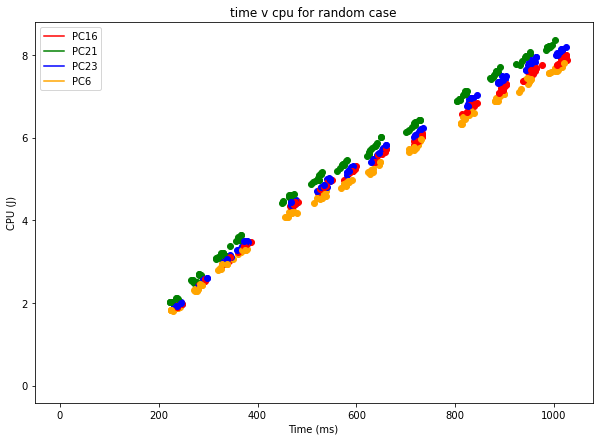

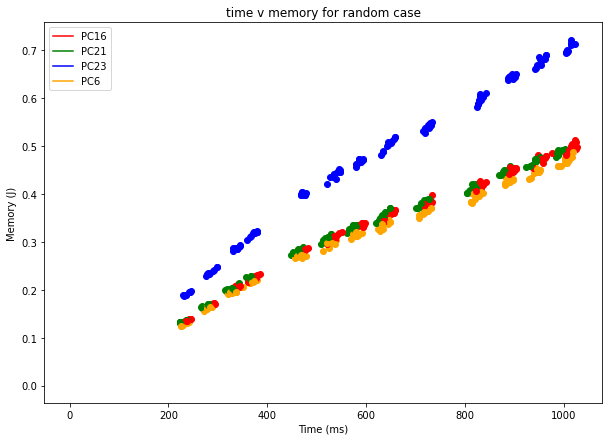

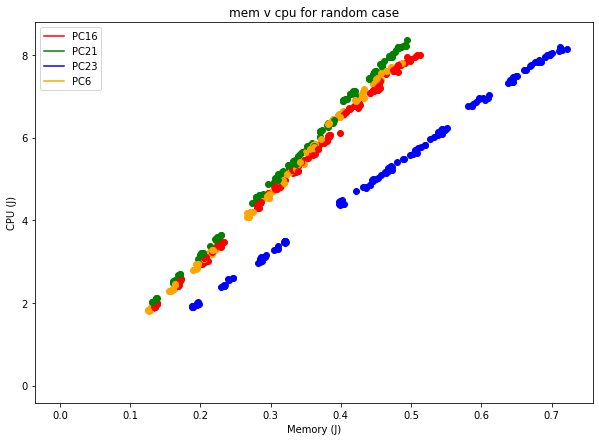

In [63]:
case = "random"
x = "Time (ms)"

plotRandDFs(x, "CPU (J)", listOfDF, case, colors, "time v cpu")
plotRandDFs(x, "Memory (J)", listOfDF, case, colors, "time v memory")
plotRandDFs("Memory (J)", "CPU (J)", listOfDF, case, colors, "mem v cpu")


# BEST

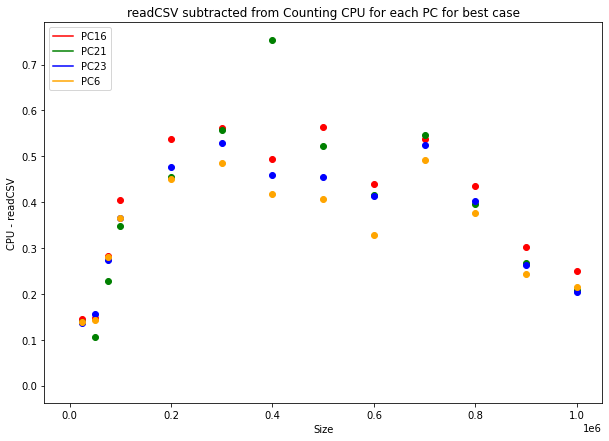

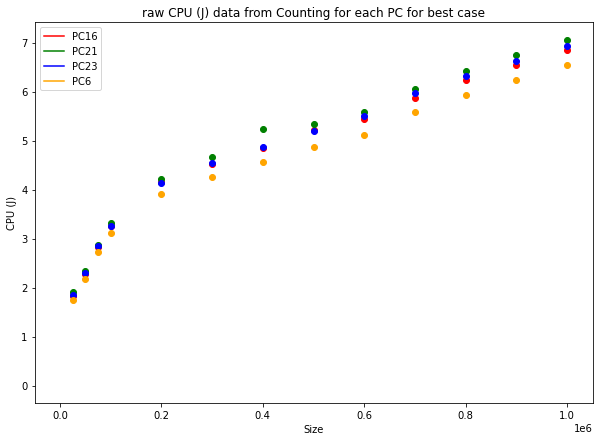

In [64]:

plotdfs("Size", "CPU - readCSV", listOfDF, "best", colors, "readCSV subtracted from Counting CPU for each PC")
plotdfs("Size", "CPU (J)", listOfDF, "best", colors, "raw CPU (J) data from Counting for each PC")


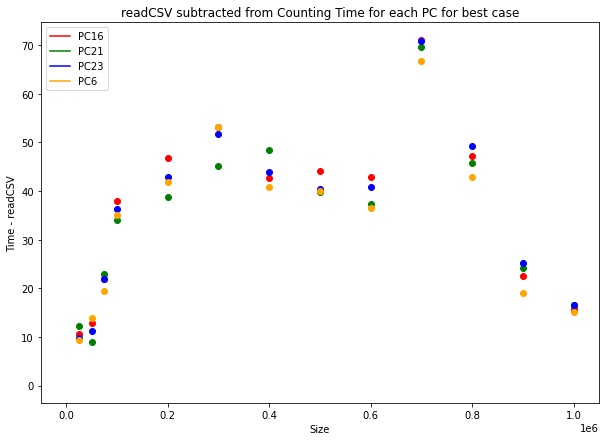

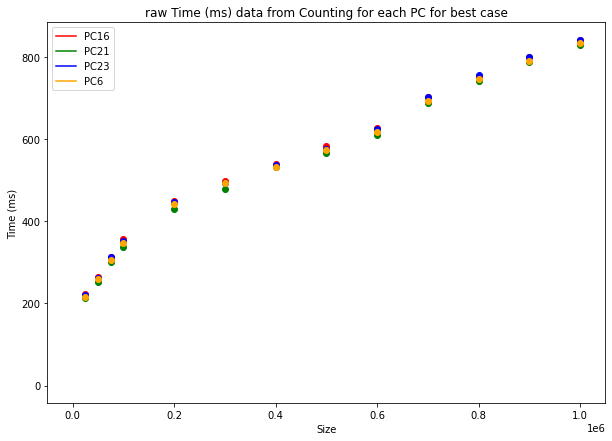

In [65]:
plotdfs("Size", "Time - readCSV", listOfDF, "best", colors, "readCSV subtracted from Counting Time for each PC")
plotdfs("Size", "Time (ms)", listOfDF, "best", colors, "raw Time (ms) data from Counting for each PC")

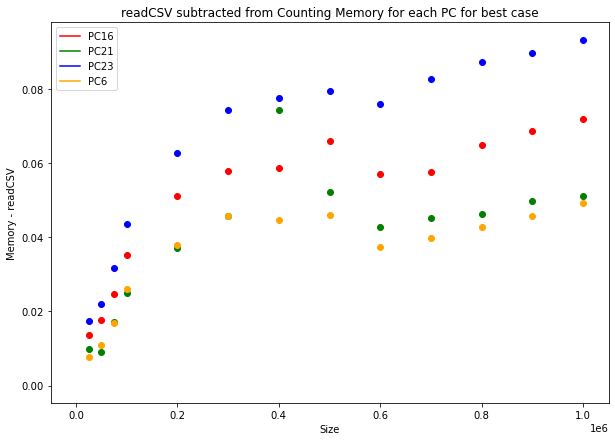

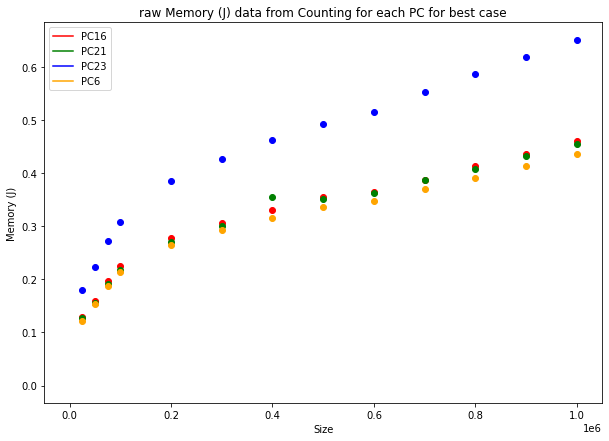

In [66]:
plotdfs("Size", "Memory - readCSV", listOfDF, "best", colors, "readCSV subtracted from Counting Memory for each PC")
plotdfs("Size", "Memory (J)", listOfDF, "best", colors, "raw Memory (J) data from Counting for each PC")

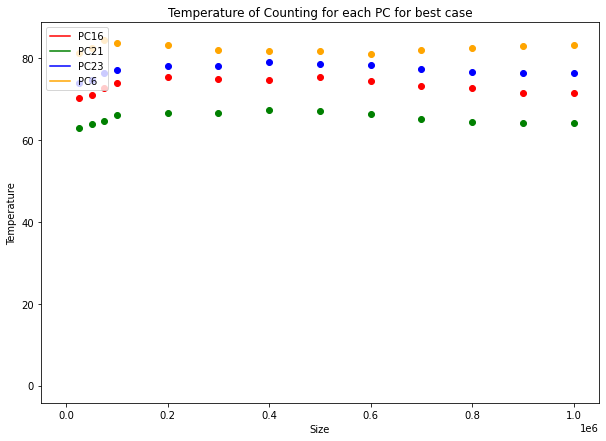

In [67]:
plotdfs("Size", "Temperature", listOfDF, "best", colors, "Temperature of Counting for each PC")

# WORST

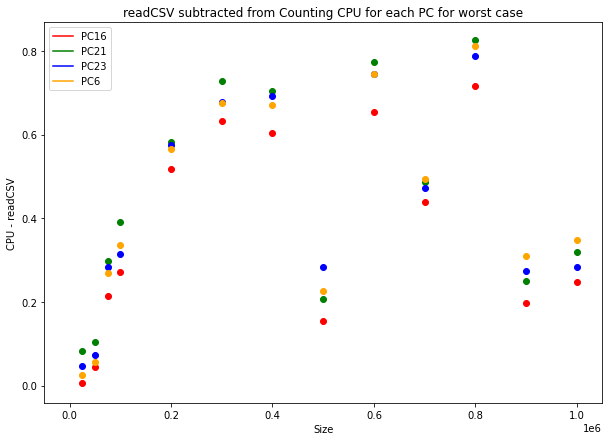

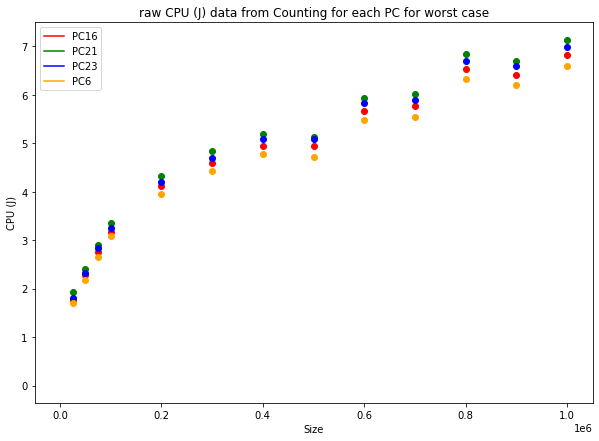

In [68]:
plotdfs("Size", "CPU - readCSV", listOfDF, "worst", colors, "readCSV subtracted from Counting CPU for each PC")
plotdfs("Size", "CPU (J)", listOfDF, "worst", colors, "raw CPU (J) data from Counting for each PC")

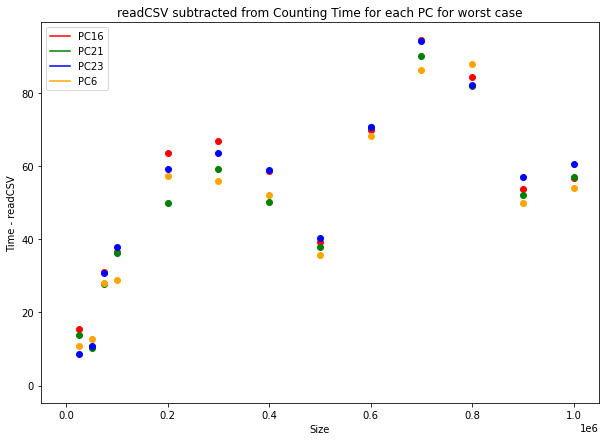

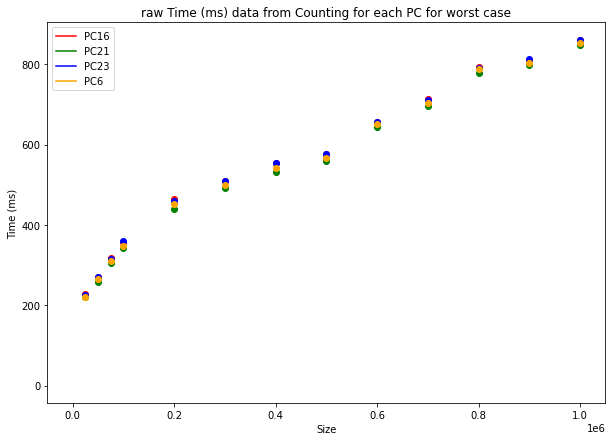

In [69]:
plotdfs("Size", "Time - readCSV", listOfDF, "worst", colors, "readCSV subtracted from Counting Time for each PC")
plotdfs("Size", "Time (ms)", listOfDF, "worst", colors, "raw Time (ms) data from Counting for each PC")

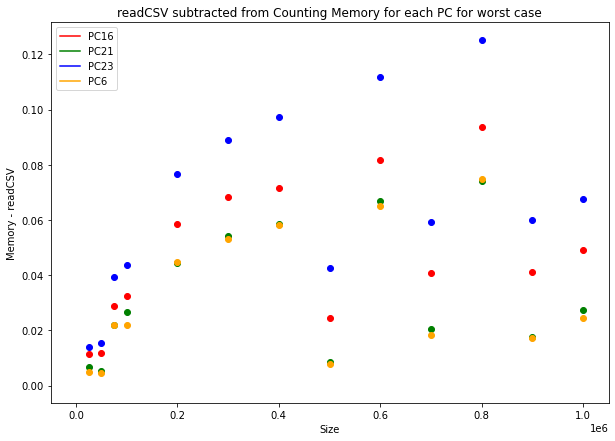

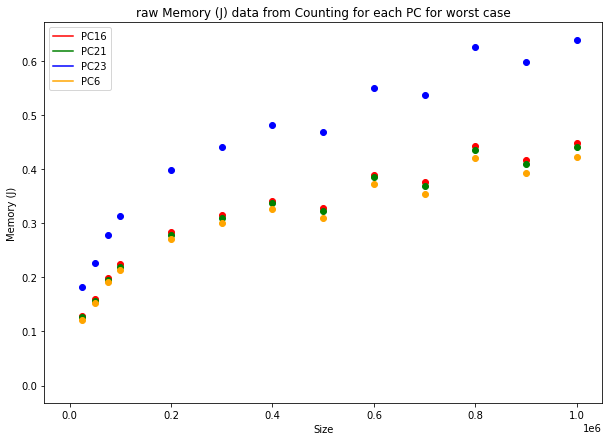

In [70]:
plotdfs("Size", "Memory - readCSV", listOfDF, "worst", colors, "readCSV subtracted from Counting Memory for each PC")
plotdfs("Size", "Memory (J)", listOfDF, "worst", colors, "raw Memory (J) data from Counting for each PC")

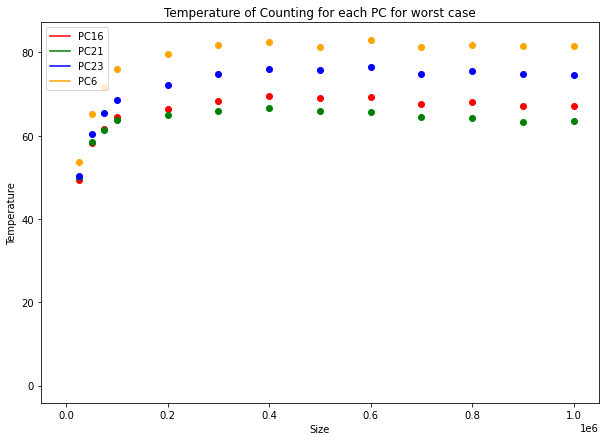

In [71]:
plotdfs("Size", "Temperature", listOfDF, "worst", colors, "Temperature of Counting for each PC")

# RANDOM

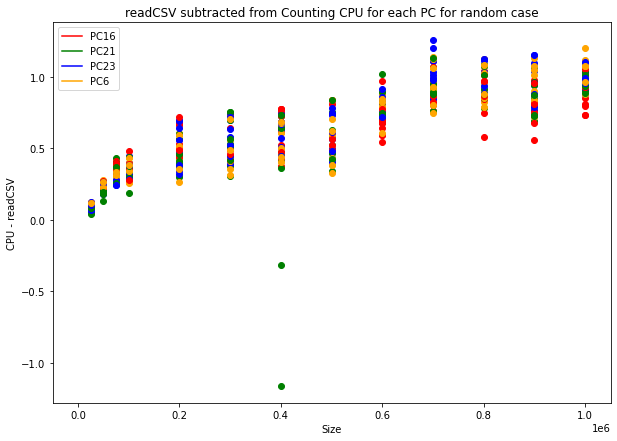

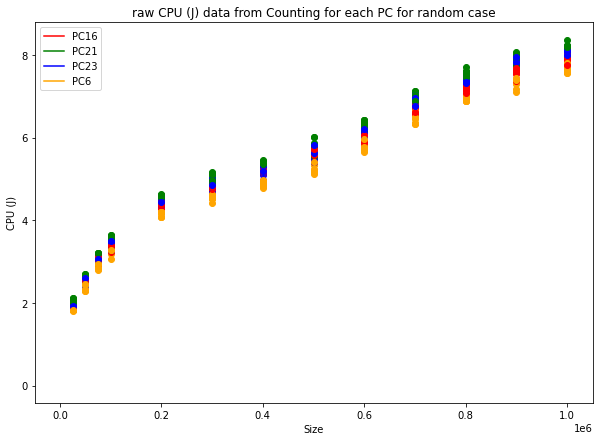

In [72]:

plotRandDFs("Size", "CPU - readCSV", listOfDF, "random", colors, "readCSV subtracted from Counting CPU for each PC")
plotRandDFs("Size", "CPU (J)", listOfDF, "random", colors, "raw CPU (J) data from Counting for each PC")


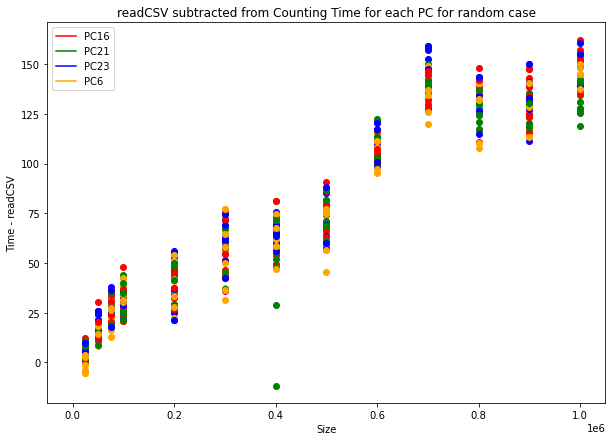

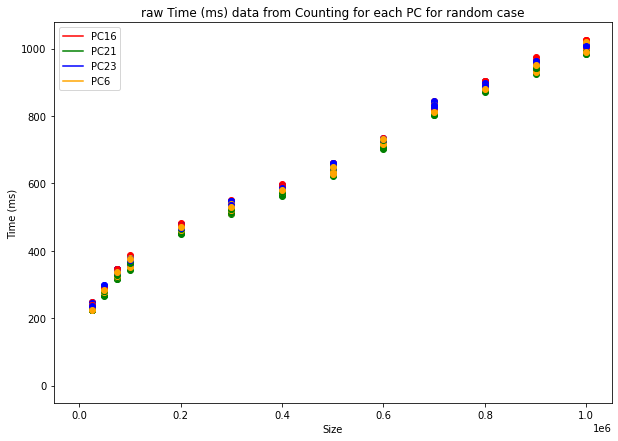

In [73]:

plotRandDFs("Size", "Time - readCSV", listOfDF, "random", colors, "readCSV subtracted from Counting Time for each PC")
plotRandDFs("Size", "Time (ms)", listOfDF, "random", colors, "raw Time (ms) data from Counting for each PC")


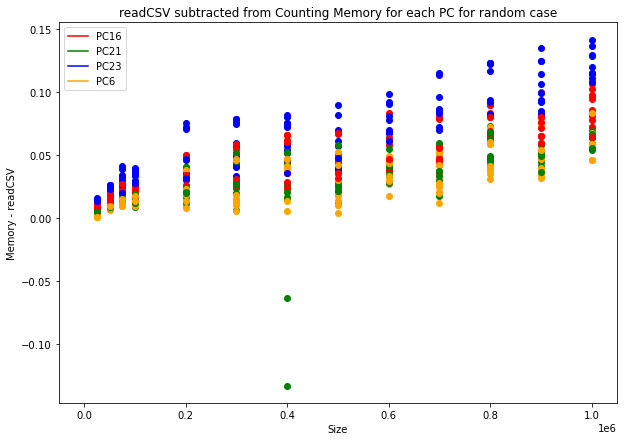

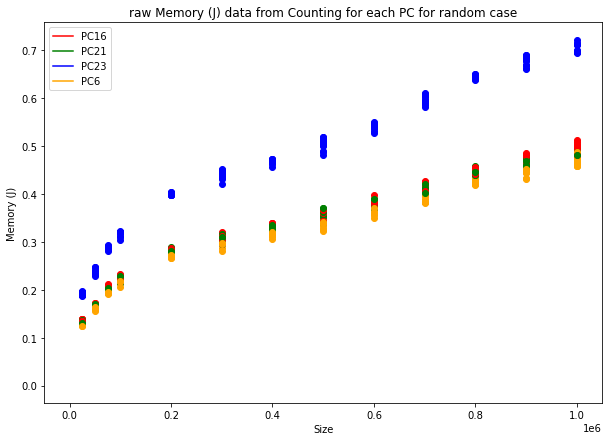

In [74]:

plotRandDFs("Size", "Memory - readCSV", listOfDF, "random", colors, "readCSV subtracted from Counting Memory for each PC")
plotRandDFs("Size", "Memory (J)", listOfDF, "random", colors, "raw Memory (J) data from Counting for each PC")


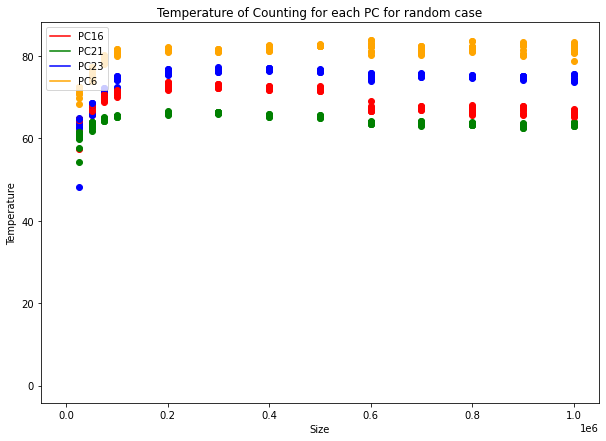

In [75]:

plotRandDFs("Size", "Temperature", listOfDF, "random", colors, "Temperature of Counting for each PC")


In [76]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics
from operator import itemgetter

def polyReg(SeriesX, SeriesY,dg, Label, color, plotLabel = True, printR2Score = True, plotGraph = True):
    X = SeriesX.values.reshape(SeriesX.size, -1)
    y = SeriesY.values

    fitness = []
   #for dg in range(minDegrees, maxDegrees):
    # Create an empty polynomial function with degree of 4
    poly_reg = PolynomialFeatures(degree=dg)
    
    # Fit the function to the X and transform X to the polynomial format
    X_poly = poly_reg.fit_transform(X)

    # Now we construct a Multiple Linear Regressor on the transformed X_ploy
    lr_2 = LinearRegression()  
    lr_2.fit(X_poly, y)  
    
    # Get the y values using the constructed Multiple Linear Regressor
    y_poly = lr_2.predict(X_poly)
    
    r2 = metrics.r2_score(y,y_poly)
    #if printR2Score:
    #    print(f"r2_score for {Label} {dg} is: {r2}")
    fitness.append((f"poly {dg}dg", r2, y_poly))
    #print(f"Parameters of poly: {poly_reg.get_params()}") #does not give what we are looking for
    
    if plotGraph:
        plt.scatter(X, y, color=color, label=Label)
        plt.legend(loc='upper left')
        plt.plot(X, y_poly, color="blue",label= Label, linewidth=2)
    print(lr_2.intercept_, lr_2.coef_)
    return max(fitness,key=itemgetter(1))
        


11.165819290219112 [ 0.00000000e+00  1.70340147e-04 -1.65377994e-10]
14.636462101857504 [ 0.00000000e+00  1.82420065e-04 -1.39801686e-10]
worst R2  0.6728449351654593 

best R2  0.6901536591081014 



Text(0, 0.5, 'Time (ms) -readCSV')

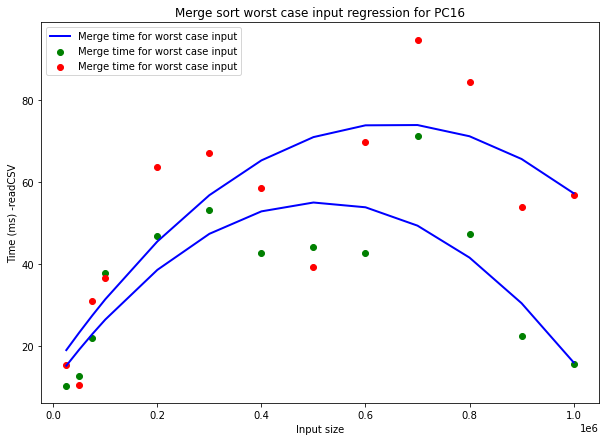

In [79]:
plt.figure(figsize=(10,7))
color = "red"

best = polyReg(meanC16[meanC16["Input case"] == "best"]["Size"], meanC16[meanC16["Input case"] == "best"]["Time - readCSV"],2, "Merge time for worst case input", "green")
worst = polyReg(meanC16[meanC16["Input case"] == "worst"]["Size"], meanC16[meanC16["Input case"] == "worst"]["Time - readCSV"],2, "Merge time for worst case input", "red")

print(f"worst R2 ", worst[1], "\n")
print(f"best R2 ", best[1], "\n")
plt.title("Merge sort worst case input regression for PC16")
plt.xlabel("Input size")
plt.ylabel("Time (ms) -readCSV")


0.4843292013581415 [ 0.00000000e+00  7.55519426e-03 -1.07833248e-06]
f(x) = 0.00070729 x +  644.5733176424646 
$f(x) = 7.55519426*10^{-3} * x^2 - 1.0783324810^{-6} * x + 0.4843292013581415$